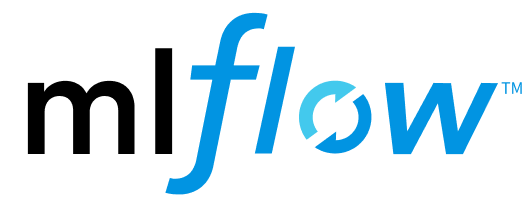

*https://databricks.com/product/managed-mlflow*

#MLFlow Review
By: Jhonnatan Torres <br>
Created on: October 9th, 2021 <br>
Version : 1

The goal is of this notebook is to review the features and performance of the [**MLFlow**](https://mlflow.org/docs/latest/index.html) library; This library is commonly used to log the results of Machine Learning models.
___

Installing libraries

In [1]:
!pip install -U mlflow -q
!pip install -U scikit-learn -q

     |████████████████████████████████| 14.6 MB 121 kB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 146 kB 62.8 MB/s 
     |████████████████████████████████| 180 kB 61.6 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 46.8 MB/s 
     |████████████████████████████████| 636 kB 57.5 MB/s 
     |████████████████████████████████| 75 kB 5.9 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 23.1 MB 4.0 kB/s 


In [2]:
import sklearn
import mlflow

print(sklearn.__version__)
print(mlflow.__version__)

1.0
1.20.2


Importing required libraries

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import tensorflow

Creating the experiment id to log the results

In [4]:
exp_id = mlflow.create_experiment("MLflowTest")

Iris dataset is used in the experiments

In [5]:
df = load_iris(return_X_y=True, as_frame=True)

In [6]:
X = df[0]
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, stratify=y, test_size=0.25)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


### Sklearn Logs

1st log using the **sklearn.autolog** option

In [8]:
with mlflow.start_run(experiment_id=exp_id):
  mlflow.sklearn.autolog()
  params = {'random_state':1234, 'max_iter':250}
  lr = LogisticRegression(**params)
  lr.fit(X_train, y_train)
  mlflow.log_param("Alias", "Log_Reg")
  mlflow.log_metric("Test_Accuracy", lr.score(X_test, y_test))
  mlflow.sklearn.log_model(lr, "logreg")

2021/10/10 00:00:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2021/10/10 00:00:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator."
2021/10/10 00:00:56 ERROR mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp359fy5cf/model/model.pkl, flavor: sklearn)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py", line 3016, in _dep_map
    return self.__

2nd log using the same **sklearn.autolog** option

In [9]:
with mlflow.start_run(experiment_id=exp_id):
  mlflow.sklearn.autolog()
  dt = DecisionTreeClassifier(max_depth=3, random_state=1234)
  dt.fit(X_train, y_train)
  mlflow.log_param("Alias", "Decision_Tree")
  mlflow.log_metric("Test_Accuracy", dt.score(X_test, y_test))
  mlflow.sklearn.log_model(dt, "decision_tree")

2021/10/10 00:00:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2021/10/10 00:00:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator."


Querying the results of the two models

In [10]:
mlflow.search_runs(experiment_ids=exp_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Test_Accuracy,metrics.training_recall_score,metrics.training_accuracy_score,metrics.training_score,metrics.DecisionTreeClassifier_score_X_test,metrics.training_roc_auc_score,metrics.training_f1_score,metrics.training_precision_score,metrics.training_log_loss,metrics.LogisticRegression_score_X_test,params.max_leaf_nodes,params.random_state,params.max_depth,params.min_samples_split,params.class_weight,params.min_samples_leaf,params.criterion,params.splitter,params.max_features,params.min_weight_fraction_leaf,params.min_impurity_decrease,params.ccp_alpha,params.Alias,params.n_jobs,params.warm_start,params.multi_class,params.dual,params.fit_intercept,params.penalty,params.intercept_scaling,params.C,params.max_iter,params.tol,params.solver,params.verbose,params.l1_ratio,tags.mlflow.log-model.history,tags.estimator_class,tags.mlflow.user,tags.mlflow.source.name,tags.estimator_name,tags.mlflow.source.type
0,4160f7829a11496b998e0a55c25a84d7,1,FINISHED,file:///content/mlruns/1/4160f7829a11496b998e0...,2021-10-10 00:00:58.159000+00:00,2021-10-10 00:01:01.457000+00:00,0.947368,0.973214,0.973214,0.973214,0.947368,0.994570,0.973209,0.973436,0.073260,NaN,None,1234,3,2,None,1,gini,best,None,0.0,0.0,0.0,Decision_Tree,None,None,None,None,None,None,None,None,None,None,None,None,None,"[{""run_id"": ""4160f7829a11496b998e0a55c25a84d7""...",sklearn.tree._classes.DecisionTreeClassifier,root,/usr/local/lib/python3.7/dist-packages/ipykern...,DecisionTreeClassifier,LOCAL
1,3a7c1492a95f41b2a5db318ac821ea3a,1,FINISHED,file:///content/mlruns/1/3a7c1492a95f41b2a5db3...,2021-10-10 00:00:54.126000+00:00,2021-10-10 00:00:58.145000+00:00,1.000000,0.973214,0.973214,0.973214,NaN,0.997828,0.973170,0.975223,0.133967,1.0,None,1234,None,None,None,None,None,None,None,None,None,None,Log_Reg,None,False,auto,False,True,l2,1,1.0,250,0.0001,lbfgs,0,None,"[{""run_id"": ""3a7c1492a95f41b2a5db318ac821ea3a""...",sklearn.linear_model._logistic.LogisticRegression,root,/usr/local/lib/python3.7/dist-packages/ipykern...,LogisticRegression,LOCAL


Reducing the number of columns, like in a pandas dataframe

In [11]:
mlflow.search_runs(experiment_ids=exp_id)[['params.Alias', 'metrics.Test_Accuracy', 'metrics.training_accuracy_score']]

,params.Alias,metrics.Test_Accuracy,metrics.training_accuracy_score
0,Decision_Tree,0.947368,0.973214
1,Log_Reg,1.000000,0.973214


### Sklearn Pipeline Logs

Are Sklearn Pipelines supported?

In [12]:
with mlflow.start_run(experiment_id=exp_id):
  from sklearn.preprocessing import StandardScaler
  from sklearn.pipeline import make_pipeline
  mlflow.sklearn.autolog()
  params = {'random_state':1234, 'max_iter':250}
  pl = make_pipeline(StandardScaler(), LogisticRegression(**params))
  pl.fit(X_train, y_train)
  mlflow.log_param("Alias", "Pipeline_logreg")
  mlflow.log_metric("Test_Accuracy", pl.score(X_test, y_test))
  mlflow.sklearn.log_model(pl, "pl_log_reg")

2021/10/10 00:01:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2021/10/10 00:01:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator."


In [13]:
mlflow.search_runs(experiment_ids=exp_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Test_Accuracy,metrics.training_recall_score,metrics.Pipeline_score_X_test,metrics.training_accuracy_score,metrics.training_score,metrics.training_roc_auc_score,metrics.training_f1_score,metrics.training_precision_score,metrics.training_log_loss,metrics.DecisionTreeClassifier_score_X_test,metrics.LogisticRegression_score_X_test,params.logisticregression__warm_start,params.logisticregression__max_iter,params.logisticregression__random_state,params.logisticregression__intercept_scaling,params.memory,params.standardscaler__copy,params.standardscaler__with_std,params.logisticregression__penalty,params.standardscaler__with_mean,params.Alias,params.logisticregression,params.logisticregression__l1_ratio,params.logisticregression__n_jobs,params.logisticregression__dual,params.logisticregression__class_weight,params.logisticregression__verbose,params.logisticregression__multi_class,params.logisticregression__fit_intercept,params.logisticregression__C,params.logisticregression__solver,params.steps,params.verbose,params.logisticregression__tol,params.standardscaler,params.max_leaf_nodes,params.random_state,params.max_depth,params.min_samples_split,params.class_weight,params.min_samples_leaf,params.criterion,params.splitter,params.max_features,params.min_weight_fraction_leaf,params.min_impurity_decrease,params.ccp_alpha,params.n_jobs,params.warm_start,params.multi_class,params.dual,params.fit_intercept,params.penalty,params.intercept_scaling,params.C,params.max_iter,params.tol,params.solver,params.l1_ratio,tags.mlflow.log-model.history,tags.estimator_class,tags.mlflow.user,tags.mlflow.source.name,tags.estimator_name,tags.mlflow.source.type
0,4275575272c94339aec3060ee7c85939,1,FINISHED,file:///content/mlruns/1/4275575272c94339aec30...,2021-10-10 00:01:01.618000+00:00,2021-10-10 00:01:04.959000+00:00,1.000000,0.964286,1.0,0.964286,0.964286,0.998190,0.964260,0.965149,0.144170,NaN,NaN,False,250,1234,1,None,True,True,l2,True,Pipeline_logreg,"LogisticRegression(max_iter=250, random_state=...",None,None,False,None,0,auto,True,1.0,lbfgs,"[('standardscaler', StandardScaler()), ('logis...",False,0.0001,StandardScaler(),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[{""run_id"": ""4275575272c94339aec3060ee7c85939""...",sklearn.pipeline.Pipeline,root,/usr/local/lib/python3.7/dist-packages/ipykern...,Pipeline,LOCAL
1,4160f7829a11496b998e0a55c25a84d7,1,FINISHED,file:///content/mlruns/1/4160f7829a11496b998e0...,2021-10-10 00:00:58.159000+00:00,2021-10-10 00:01:01.457000+00:00,0.947368,0.973214,NaN,0.973214,0.973214,0.994570,0.973209,0.973436,0.073260,0.947368,NaN,None,None,None,None,None,None,None,None,None,Decision_Tree,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1234,3,2,None,1,gini,best,None,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,"[{""run_id"": ""4160f7829a11496b998e0a55c25a84d7""...",sklearn.tree._classes.DecisionTreeClassifier,root,/usr/local/lib/python3.7/dist-packages/ipykern...,DecisionTreeClassifier,LOCAL
2,3a7c1492a95f41b2a5db318ac821ea3a,1,FINISHED,file:///content/mlruns/1/3a7c1492a95f41b2a5db3...,2021-10-10 00:00:54.126000+00:00,2021-10-10 00:00:58.145000+00:00,1.000000,0.973214,NaN,0.973214,0.973214,0.997828,0.973170,0.975223,0.133967,NaN,1.0,None,None,None,None,None,None,None,None,None,Log_Reg,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,1234,None,None,None,None,None,None,None,None,None,None,None,False,auto,False,True,l2,1,1.0,250,0.0001,lbfgs,None,"[{""run_id"": ""3a7c1492a95f41b2a5db318ac821ea3a""...",sklearn.linear_model._logistic.LogisticRegression,root,/usr/local/lib/python3.7/dist-packages/ipykern...,LogisticRegression,LOCAL


Yes, pipelines are supported

### XGBClassifier Logs

Using the same **sklearn.autolog** option to log the results of a XGBClassifier using the sklearn wrapper

In [14]:
with mlflow.start_run(experiment_id=exp_id):
  mlflow.sklearn.autolog()
  xgb = XGBClassifier(n_estimators=3, max_depth=3, random_state=1234, subsample=0.5)
  xgb.fit(X_train, y_train)
  mlflow.log_param("Alias", "XGBClassifier")
  mlflow.log_metric("Test_Accuracy", xgb.score(X_test, y_test))
  mlflow.sklearn.log_model(xgb, "xgb")

2021/10/10 00:01:05 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Querying the results

In [15]:
mlflow.search_runs(experiment_ids=exp_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Test_Accuracy,metrics.training_recall_score,metrics.Pipeline_score_X_test,metrics.training_accuracy_score,metrics.training_score,metrics.training_roc_auc_score,metrics.training_f1_score,metrics.training_precision_score,metrics.training_log_loss,metrics.DecisionTreeClassifier_score_X_test,metrics.LogisticRegression_score_X_test,params.Alias,params.logisticregression__warm_start,params.logisticregression__max_iter,params.logisticregression__random_state,params.logisticregression__intercept_scaling,params.memory,params.standardscaler__copy,params.standardscaler__with_std,params.logisticregression__penalty,params.standardscaler__with_mean,params.logisticregression,params.logisticregression__l1_ratio,params.logisticregression__n_jobs,params.logisticregression__dual,params.logisticregression__class_weight,params.logisticregression__verbose,params.logisticregression__multi_class,params.logisticregression__fit_intercept,params.logisticregression__C,params.logisticregression__solver,params.steps,params.verbose,params.logisticregression__tol,params.standardscaler,params.max_leaf_nodes,params.random_state,params.max_depth,params.min_samples_split,params.class_weight,params.min_samples_leaf,params.criterion,params.splitter,params.max_features,params.min_weight_fraction_leaf,params.min_impurity_decrease,params.ccp_alpha,params.n_jobs,params.warm_start,params.multi_class,params.dual,params.fit_intercept,params.penalty,params.intercept_scaling,params.C,params.max_iter,params.tol,params.solver,params.l1_ratio,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.user,tags.estimator_name,tags.estimator_class
0,bb2b95011df245b9832bc972ee1375fa,1,FINISHED,file:///content/mlruns/1/bb2b95011df245b9832bc...,2021-10-10 00:01:05.120000+00:00,2021-10-10 00:01:07.039000+00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XGBClassifier,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""bb2b95011df245b9832bc972ee1375fa""...",LOCAL,root,None,None
1,4275575272c94339aec3060ee7c85939,1,FINISHED,file:///content/mlruns/1/4275575272c94339aec30...,2021-10-10 00:01:01.618000+00:00,2021-10-10 00:01:04.959000+00:00,1.000000,0.964286,1.0,0.964286,0.964286,0.998190,0.964260,0.965149,0.144170,NaN,NaN,Pipeline_logreg,False,250,1234,1,None,True,True,l2,True,"LogisticRegression(max_iter=250, random_state=...",None,None,False,None,0,auto,True,1.0,lbfgs,"[('standardscaler', StandardScaler()), ('logis...",False,0.0001,StandardScaler(),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""4275575272c94339aec3060ee7c85939""...",LOCAL,root,Pipeline,sklearn.pipeline.Pipeline
2,4160f7829a11496b998e0a55c25a84d7,1,FINISHED,file:///content/mlruns/1/4160f7829a11496b998e0...,2021-10-10 00:00:58.159000+00:00,2021-10-10 00:01:01.457000+00:00,0.947368,0.973214,NaN,0.973214,0.973214,0.994570,0.973209,0.973436,0.073260,0.947368,NaN,Decision_Tree,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1234,3,2,None,1,gini,best,None,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""4160f7829a11496b998e0a55c25a84d7""...",LOCAL,root,DecisionTreeClassifier,sklearn.tree._classes.DecisionTreeClassifier
3,3a7c1492a95f41b2a5db318ac821ea3a,1,FINISHED,file:///content/mlruns/1/3a7c1492a95f41b2a5db3...,2021-10-10 00:00:54.126000+00:00,2021-10-10 00:00:58.145000+00:00,1.000000,0.973214,NaN,0.973214,0.973214,0.997828,0.973170,0.975223,0.133967,NaN,1.0,Log_Reg,None,None,

The *params* and *metrics** were not logged, let's try with the option **xgboost.autolog**

In [16]:
with mlflow.start_run(experiment_id=exp_id):
  mlflow.xgboost.autolog()
  xgb = XGBClassifier(n_estimators=3, max_depth=3, random_state=1234, subsample=0.5)
  xgb.fit(X_train, y_train)
  mlflow.log_param("Alias", "XGBClassifier")
  mlflow.log_metric("Test_Accuracy", xgb.score(X_test, y_test))
  mlflow.sklearn.log_model(xgb, "xgb")

In [17]:
mlflow.search_runs(experiment_ids=exp_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Test_Accuracy,metrics.training_recall_score,metrics.Pipeline_score_X_test,metrics.training_accuracy_score,metrics.training_score,metrics.training_roc_auc_score,metrics.training_f1_score,metrics.training_precision_score,metrics.training_log_loss,metrics.DecisionTreeClassifier_score_X_test,metrics.LogisticRegression_score_X_test,params.Alias,params.logisticregression__warm_start,params.logisticregression__max_iter,params.logisticregression__random_state,params.logisticregression__intercept_scaling,params.memory,params.standardscaler__copy,params.standardscaler__with_std,params.logisticregression__penalty,params.standardscaler__with_mean,params.logisticregression,params.logisticregression__l1_ratio,params.logisticregression__n_jobs,params.logisticregression__dual,params.logisticregression__class_weight,params.logisticregression__verbose,params.logisticregression__multi_class,params.logisticregression__fit_intercept,params.logisticregression__C,params.logisticregression__solver,params.steps,params.verbose,params.logisticregression__tol,params.standardscaler,params.max_leaf_nodes,params.random_state,params.max_depth,params.min_samples_split,params.class_weight,params.min_samples_leaf,params.criterion,params.splitter,params.max_features,params.min_weight_fraction_leaf,params.min_impurity_decrease,params.ccp_alpha,params.n_jobs,params.warm_start,params.multi_class,params.dual,params.fit_intercept,params.penalty,params.intercept_scaling,params.C,params.max_iter,params.tol,params.solver,params.l1_ratio,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.user,tags.estimator_name,tags.estimator_class
0,d6ffba87db1b436197f483113d414568,1,FINISHED,file:///content/mlruns/1/d6ffba87db1b436197f48...,2021-10-10 00:01:07.183000+00:00,2021-10-10 00:01:08.776000+00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XGBClassifier,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""d6ffba87db1b436197f483113d414568""...",LOCAL,root,None,None
1,bb2b95011df245b9832bc972ee1375fa,1,FINISHED,file:///content/mlruns/1/bb2b95011df245b9832bc...,2021-10-10 00:01:05.120000+00:00,2021-10-10 00:01:07.039000+00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XGBClassifier,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""bb2b95011df245b9832bc972ee1375fa""...",LOCAL,root,None,None
2,4275575272c94339aec3060ee7c85939,1,FINISHED,file:///content/mlruns/1/4275575272c94339aec30...,2021-10-10 00:01:01.618000+00:00,2021-10-10 00:01:04.959000+00:00,1.000000,0.964286,1.0,0.964286,0.964286,0.998190,0.964260,0.965149,0.144170,NaN,NaN,Pipeline_logreg,False,250,1234,1,None,True,True,l2,True,"LogisticRegression(max_iter=250, random_state=...",None,None,False,None,0,auto,True,1.0,lbfgs,"[('standardscaler', StandardScaler()), ('logis...",False,0.0001,StandardScaler(),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""4275575272c94339aec3060ee7c85939""...",LOCAL,root,Pipeline,sklearn.pipeline.Pipeline
3,4160f7829a11496b998e0a55c25a84d7,1,FINISHED,file:///content/mlruns/1/4160f7829a11496b998e0...,2021-10-10 00:00:58.159000+00:00,2021-10-10 00:01:01.457000+00:00,0.947368,0.973214,NaN,0.973214,0.973214,0.994570,0.973209,0.973436,0.073260,0.947368,NaN,Decision_Tree,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,

Same results, *params* and *metrics* were not logged, it seems like there is an issue with this estimator or library

### Keras Logs

What about the Tensorflow/Keras models? Are these models supported in MLFlow?? Let's find it out

In [18]:
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.Dense(32, input_shape=(4, ), activation='relu'))
model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")

Logging the results of the model using the **keras.autolog** option

In [21]:
with mlflow.start_run(experiment_id=exp_id):
  mlflow.keras.autolog()
  model.fit(X_train.values, y_train, batch_size=8, epochs=15)
  mlflow.log_param("Alias", "Keras2LayersModel")
  mlflow.log_metric("Test_Accuracy", model.evaluate(X_test.values, y_test)[1])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/mlflow/utils/autologging_utils/__init__.py:411: FutureWarning: Autologging support for keras >= 2.6.0 has been deprecated and will be removed in a future MLflow release. Use `mlflow.tensorflow.autolog()` instead.
  return _autolog(*args, **kwargs)


14/14 [==============================] - 1s 1ms/step - loss: 1.2730 - accuracy: 0.6339
Epoch 2/15
14/14 [==============================] - 0s 1ms/step - loss: 0.9888 - accuracy: 0.6696
Epoch 3/15
14/14 [==============================] - 0s 1ms/step - loss: 0.8688 - accuracy: 0.4643
Epoch 4/15
14/14 [==============================] - 0s 1ms/step - loss: 0.7886 - accuracy: 0.4107
Epoch 5/15
14/14 [==============================] - 0s 1ms/step - loss: 0.7462 - accuracy: 0.4018
Epoch 6/15
14/14 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.5536
Epoch 7/15
14/14 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6518
Epoch 8/15
14/14 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.5357
Epoch 9/15
14/14 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.5268
Epoch 10/15
14/14 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.5982
Epoch 11/15
14/14 [===========

Querying the results, the *params* and *metrics* were logged

In [22]:
mlflow.search_runs(experiment_ids=exp_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.loss,metrics.accuracy,metrics.Test_Accuracy,metrics.training_recall_score,metrics.Pipeline_score_X_test,metrics.training_accuracy_score,metrics.training_score,metrics.training_roc_auc_score,metrics.training_f1_score,metrics.training_precision_score,metrics.training_log_loss,metrics.DecisionTreeClassifier_score_X_test,metrics.LogisticRegression_score_X_test,params.num_layers,params.use_multiprocessing,params.learning_rate,params.class_weight,params.validation_freq,params.validation_batch_size,params.validation_split,params.steps_per_epoch,params.validation_steps,params.Alias,params.workers,params.batch_size,params.initial_epoch,params.max_queue_size,params.epsilon,params.optimizer_name,params.epochs,params.sample_weight,params.shuffle,params.logisticregression__warm_start,params.logisticregression__random_state,...,params.standardscaler__with_std,params.logisticregression,params.logisticregression__n_jobs,params.logisticregression__class_weight,params.logisticregression__verbose,params.logisticregression__fit_intercept,params.logisticregression__solver,params.steps,params.logisticregression__multi_class,params.logisticregression__tol,params.standardscaler,params.max_leaf_nodes,params.random_state,params.max_depth,params.min_samples_split,params.min_samples_leaf,params.criterion,params.splitter,params.max_features,params.min_weight_fraction_leaf,params.min_impurity_decrease,params.ccp_alpha,params.n_jobs,params.warm_start,params.multi_class,params.dual,params.fit_intercept,params.penalty,params.intercept_scaling,params.C,params.max_iter,params.tol,params.solver,params.l1_ratio,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.user,tags.estimator_name,tags.estimator_class
0,bc98a9763a59401dbc019032211ed0ae,1,FINISHED,file:///content/mlruns/1/bc98a9763a59401dbc019...,2021-10-10 00:01:09.425000+00:00,2021-10-10 00:01:15.087000+00:00,0.529747,0.669643,0.657895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,False,0.001,None,1,None,0.0,None,None,Keras2LayersModel,1,8,0,10,1e-07,Adam,15,None,True,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""bc98a9763a59401dbc019032211ed0ae""...",LOCAL,root,None,None
1,d6ffba87db1b436197f483113d414568,1,FINISHED,file:///content/mlruns/1/d6ffba87db1b436197f48...,2021-10-10 00:01:07.183000+00:00,2021-10-10 00:01:08.776000+00:00,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,XGBClassifier,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""d6ffba87db1b436197f483113d414568""...",LOCAL,root,None,None
2,bb2b95011df245b9832bc972ee1375fa,1,FINISHED,file:///content/mlruns/1/bb2b95011df245b9832bc...,2021-10-10 00:01:05.120000+00:00,2021-10-10 00:01:07.039000+00:00,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,XGBClassifier,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""bb2b95011df245b9832bc972ee1375fa""...",LOCAL,root,None,None
3,4275575272c94339aec3060ee7c85939,1,FINISHED,file:///content/mlruns/1/4275575272c94339aec30...,2021-10-10 00:01:01.618000+00:00,2021-10-10 00:01:04.959000+00:00,NaN,NaN,1.000000,0.964286,1.0,0.964286,0.964286,0.998190,0.964260,0.965149,0.144170,NaN,NaN,None,None,None,None,None,None,None,None

Now, let's try with the **tensorflow.autolog** option

In [23]:
with mlflow.start_run(experiment_id=exp_id):
  mlflow.tensorflow.autolog()
  model.fit(X_train.values, y_train, batch_size=8, epochs=15)
  mlflow.log_param("Alias", "Keras2LayersModel")
  mlflow.log_metric("Test_Accuracy", model.evaluate(X_test.values, y_test)[1])

Epoch 1/15
14/14 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.8393
Epoch 2/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8929
Epoch 3/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8214
Epoch 4/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.9018
Epoch 5/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.9107
Epoch 6/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.9286
Epoch 7/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.9732
Epoch 8/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.9286
Epoch 9/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.9643
Epoch 10/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.9464
Epoch 11/15
14/14 [

Results were logged as well

In [24]:
mlflow.search_runs(experiment_ids=exp_id)[['params.Alias', 'metrics.Test_Accuracy', 'metrics.accuracy', 'metrics.training_accuracy_score']]

,params.Alias,metrics.Test_Accuracy,metrics.accuracy,metrics.training_accuracy_score
0,Keras2LayersModel,0.921053,0.973214,NaN
1,Keras2LayersModel,0.657895,0.669643,NaN
2,XGBClassifier,1.000000,NaN,NaN
3,XGBClassifier,1.000000,NaN,NaN
4,Pipeline_logreg,1.000000,NaN,0.964286
5,Decision_Tree,0.947368,NaN,0.973214
6,Log_Reg,1.000000,NaN,0.973214


###XGBClassifier Workaround

It seems like the only issue is with the XGB family, let's try a workaround to log *params* and *metrics* for this type of models

In [25]:
#https://serrate.net/2018/07/03/introduction-to-mlflow/
with mlflow.start_run(experiment_id=exp_id):
  params = {'learning_rate': 0.3, 'n_estimators': 5, 'seed': 0, 'subsample': 0.5, 'max_depth': 3}
  [mlflow.log_param(key, params[key]) for key in params]

  xgb = XGBClassifier(**params)
  xgb.fit(X_train, y_train)

  mlflow.log_param("Alias", "XGBClassifier_w/o_autologging")
  mlflow.log_metric("Test_Accuracy", xgb.score(X_test, y_test))
  mlflow.sklearn.log_model(xgb, "xgb")

With a small tweak, now it is possible to log the results, this approach can be very handy when working with models of a different type or style or that are not 100% compatible with MLFlow

In [26]:
mlflow.search_runs(experiment_ids=exp_id).iloc[0:1,:]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Test_Accuracy,metrics.loss,metrics.accuracy,metrics.training_recall_score,metrics.Pipeline_score_X_test,metrics.training_accuracy_score,metrics.training_score,metrics.training_roc_auc_score,metrics.training_f1_score,metrics.training_precision_score,metrics.training_log_loss,metrics.DecisionTreeClassifier_score_X_test,metrics.LogisticRegression_score_X_test,params.learning_rate,params.max_depth,params.n_estimators,params.subsample,params.Alias,params.seed,params.class_weight,params.validation_freq,params.validation_batch_size,params.steps_per_epoch,params.opt_beta_1,params.opt_amsgrad,params.workers,params.batch_size,params.max_queue_size,params.opt_name,params.epochs,params.sample_weight,params.shuffle,params.opt_epsilon,params.use_multiprocessing,...,params.standardscaler__copy,params.standardscaler__with_std,params.logisticregression,params.logisticregression__n_jobs,params.logisticregression__class_weight,params.logisticregression__verbose,params.logisticregression__fit_intercept,params.logisticregression__solver,params.steps,params.logisticregression__multi_class,params.logisticregression__tol,params.standardscaler,params.max_leaf_nodes,params.random_state,params.min_samples_split,params.min_samples_leaf,params.criterion,params.splitter,params.max_features,params.min_weight_fraction_leaf,params.min_impurity_decrease,params.ccp_alpha,params.n_jobs,params.warm_start,params.multi_class,params.dual,params.fit_intercept,params.penalty,params.intercept_scaling,params.C,params.max_iter,params.tol,params.solver,params.l1_ratio,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.user,tags.estimator_name,tags.estimator_class
0,d26b2d566d104558b1d0db2b5da58b6f,1,FINISHED,file:///content/mlruns/1/d26b2d566d104558b1d0d...,2021-10-10 00:01:23.857000+00:00,2021-10-10 00:01:25.689000+00:00,0.973684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,3,5,0.5,XGBClassifier_w/o_autologging,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,/usr/local/lib/python3.7/dist-packages/ipykern...,"[{""run_id"": ""d26b2d566d104558b1d0db2b5da58b6f""...",LOCAL,root,None,None


### Summarized Results

Now, let's summarize the results filtering by the **Test Accuracy**

In [27]:
results = mlflow.search_runs(experiment_ids=exp_id)
results = results[results['status']=="FINISHED"]
results = results[["params.Alias", "metrics.Test_Accuracy"]]

In [28]:
results

,params.Alias,metrics.Test_Accuracy
0,XGBClassifier_w/o_autologging,0.973684
1,Keras2LayersModel,0.921053
2,Keras2LayersModel,0.657895
3,XGBClassifier,1.000000
4,XGBClassifier,1.000000
5,Pipeline_logreg,1.000000
6,Decision_Tree,0.947368
7,Log_Reg,1.000000


### Conclusion



*   Despite of some warnings, the most recent version (1.0) of Scikit_Learn is supported
*   This was a very basic review of this library, if you are using a local environment, you can access a dashboard with all the results, compare the results and get additional features like the confusion matrix and the models stored as a *pkl* file
*   This library is supported in the *Databricks* notebooks, with the same features available in a local environment (https://youtu.be/nx3yFzx_nHI)
*   In general, this is a very handy library to track the results of your Machine Learning Models / Experiments, you can summarize the results filtering by a specific metric, in addition, all the experiments are stored as "artifacts", *pkl* files for sklearn and xgb models and *pb* files for Tensorflow/Keras models
*   **In order to have more "clean" results, I would suggest to create one experiment by model / estimator type, for example, ExperimentID_A for Sklearn, ExperimentID_B for XGBoost and ExperimentID_C for Tensorflow/Keras models**